<a href="https://colab.research.google.com/github/ifeomamegwai/Le-Wagon-python-and-ML/blob/main/Airline_Satisfaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 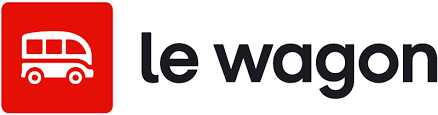

# Predicting airline satisfaction!


In this exercise we are going to try another classification task and predict the satisfaction of an airline customer with their flight!

Run the cell below to load the data

In [ ]:
import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/data-analytics/machine-learning/airline_satisfaction.csv"

airline_df = pd.read_csv(url)

airline_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Start by investigating the dataset

- How many columns / rows do we have?
- What are our targets / features?
- What kind of data are our features?
- Look at the target, what classification task are we going to be doing?
- Do we have any missing data?

In [ ]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Our target and some of our features are not yet ready to be used in a model.

Start by removing any columns that you think are unnecessary:

<details>
    <summary><i>Answer:</i></summary>
     
The 'Unnamed: 0' column is a hangover from excel, we can remove this.

Also, the 'id' column will not provide any info that is relevant to our model so this can be removed.
</details>       

In [ ]:
airline_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

We have *missing data* in one of our columns! Fill in the missing values with the median value of the column

<details>
    <summary><i>Hint:</i></summary>
     
Remember to use the `.fillna()` method of your dataframe.

You can use `.median()` method of a pandas series to get the median value
</details>    

In [ ]:
airline_df['Arrival Delay in Minutes'].fillna(airline_df['Arrival Delay in Minutes'].median(), inplace=True)


Now we need to get our **target** ready!

Encode the target variable below and save it as 'airline_target'

In [ ]:
# your code here
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

airline_target = encoder.fit_transform(airline_df['satisfaction'])
airline_target = pd.Series(airline_target, name='satisfaction')

We have to split our dataset now. Choose a split of 80/20.

In [ ]:
# your code here
from sklearn.model_selection import train_test_split

# Create your X
X = airline_df.drop(columns='satisfaction')

# Make your train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, airline_target, test_size=.2, random_state=1)


Next step is to preprocess our data.
Let's deal with the categorical features in our dataset first.

A number of these contain string labels that must be transformed into numeric values so that they can be understood by the model that we end up training.

Encode the following columns `['Gender', 'Customer Type', 'Type of Travel', 'Class']` as a dataframe called 'cat_features'. Consider trying to use sklearn's `OneHotEncoder` to do this!


<details>
    <summary><i>Hint 1:</i></summary>

Be sure to check how many labels each column has. If any columns are binary, you can use the parameter `drop='if_binary'` in your One Hot Encoder to preserve only one column if there are two labels.

Remember, if there are only two labels, the two columns produced by the encoder will be the inverse of each other and hence contain the same information!
</details>  

<details>
    <summary><i>Hint 2:</i></summary>

If the output of your One Hot Encoder doesn't look right, check the 'sparse_output' parameter of your encoder.
</details>  


<details>
    <summary><i>Hint 3:</i></summary>

You can extract the names for your columns with the `.get_feature_names_out()` method of your One Hot Encoder.
</details>

In [ ]:
# your code here
from sklearn.preprocessing import OneHotEncoder

#Create X_train_cat and X_test_cat
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

# Define our OneHotEncoder and fit it on the train set
ohe = OneHotEncoder(drop='if_binary', sparse_output=False)
ohe.fit(X_train_cat.select_dtypes(include=['object']))

# Transform both train and test set
X_train_cat = pd.DataFrame(ohe.transform(X_train_cat), columns=ohe.get_feature_names_out())
X_test_cat = pd.DataFrame(ohe.transform(X_test_cat), columns=ohe.get_feature_names_out())


Next we will address the numeric features in our dataset.

Create dataframes that contains the normalized numeric features.

<details>
    <summary><i>Hint 1:</i></summary>

Remember that you can use `.select_dtypes()` to select only columns of a specific data type from a dataframe!
</details>  


In [ ]:
# your code here
from sklearn.preprocessing import StandardScaler

# extract only numerical data
X_train_num = X_train.select_dtypes(["int", "float"])
X_test_num = X_test.select_dtypes(["int", "float"])

# Define our Scaler and fit_transform on the train set and transform the test set
sc = StandardScaler()
X_train_num = sc.fit_transform(X_train_num)
X_test_num = sc.transform(X_test_num)

# Create two dataframe with the columns name
X_train_num = pd.DataFrame(X_train_num, columns=sc.get_feature_names_out())
X_test_num = pd.DataFrame(X_test_num, columns=sc.get_feature_names_out())

Now that we have processed our numeric and cateogrical features, let's combine them back into one variable called 'X_train_preprocessed' and 'X_test_preprocessed' that contains **all** of our **preprocessed features** for each train and test data.

<details>
    <summary><i>Hint 1:</i></summary>

`pd.concat()` (The 'axis' parameter is important!)
</details>  

In [ ]:
# your code here
X_train_preprocessed = pd.concat((X_train_num, X_train_cat), axis=1)
X_test_preprocessed = pd.concat((X_test_num, X_test_cat), axis=1)

Well done! That's our preprocessing done. It's not a super quick processes, but it is **very** important.

Now, let's create our models.

We will start with a simple classifier. Train a logistic regression model on your train data. Then evaluate it's accuracy score on your test data!

In [ ]:
# your code here
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_preprocessed, y_train)

# compute accuracy
model.score(X_test_preprocessed, y_test)

# Can also use accuracy_score from sklearn

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

0.8762330975410231

88% accuracy isn't bad, but maybe we can do better...

Let's try using a more complex model on our preprocessed data. A [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) might be a good alternative choice.

<details>
<summary><i>Note</i></summary>

Random Forest models reduce overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.
</details>

Try instantiating and fitting a random forest classifier model with the same data as above and compare the accuracy scores.

In [ ]:
# your code here
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()

forest_model.fit(X_train_preprocessed, y_train)

forest_model.score(X_test_preprocessed, y_test)

0.9607333622058611

Your random forest classifier should have an **accuracy score of around 0.96**, which is a substantial improvement on the simple model we ran earlier!

Certain models will peform better than other dependent on your data. Knowing which one to use intuitively is a matter of practice. For example, random forest models are good for data that is *non-linear* in nature.

[Here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html]) is a list of classifiers available on sklearn. The explanatory documentation is a fanstastic resource.

*In the cell below pick one of the models in the documentation and use it to predict airline customer satisfaction!*

Finally, remember that **preprocessing is integral to the analysis pipeline**. A model will only return quality output **if the input is also quality**, so expect to always spend a decent amount of time on cleaning / encoding / feature engineering!